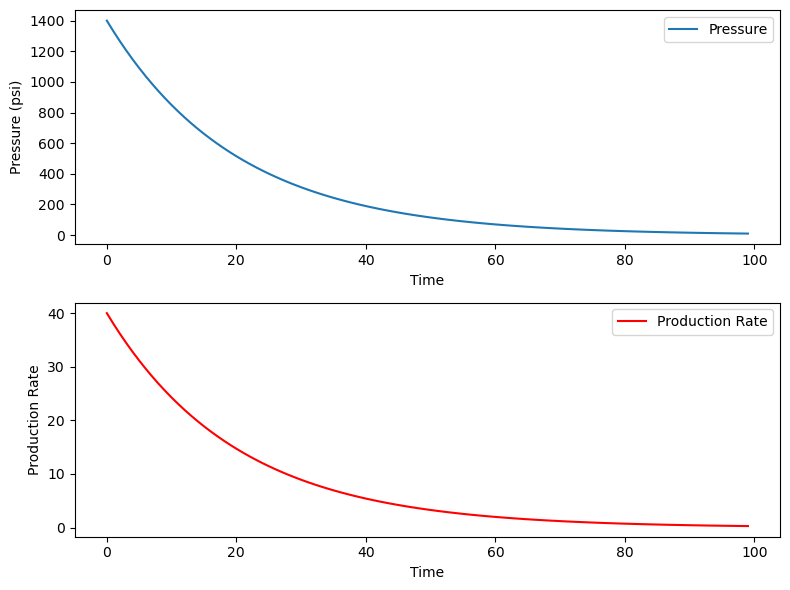

In [2]:
import numpy as np
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt

def simulate_solution_gas_drive(initial_pressure, recovery_factor):
    time = np.arange(0, 100, 1)
    pressure = initial_pressure * np.exp(-0.1 * time)
    production_rate = recovery_factor * np.exp(-0.1 * time)
    return time, pressure, production_rate

def simulate_gas_cap_drive(initial_pressure, recovery_factor):
    time = np.arange(0, 100, 1)
    pressure = initial_pressure * np.exp(-0.05 * time)
    production_rate = recovery_factor * np.exp(-0.05 * time)
    return time, pressure, production_rate

def simulate_water_drive(initial_pressure, recovery_factor):
    time = np.arange(0, 100, 1)
    pressure = initial_pressure * np.exp(-0.03 * time)
    production_rate = recovery_factor * np.exp(-0.03 * time)
    return time, pressure, production_rate

def plot_result(time, pressure, production_rate):
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time, pressure, label='Pressure')
    plt.xlabel('Time')
    plt.ylabel('Pressure (psi)')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(time, production_rate, label='Production Rate', color='red')
    plt.xlabel('Time')
    plt.ylabel('Production Rate')
    plt.legend()

    plt.tight_layout()
    plt.show()

def simulate():
    mechanism = drive_mechanism.get()
    initial_press = float(initial_pressure.get())
    recovery_fact = float(recovery_factor.get())

    if mechanism == 'Solution Drive':
        time, pressure, production_rate = simulate_solution_gas_drive(initial_press, recovery_fact)
    elif mechanism == 'Gas-cap Drive':
        time, pressure, production_rate = simulate_gas_cap_drive(initial_press, recovery_fact)
    elif mechanism == 'Water Drive':
        time, pressure, production_rate = simulate_water_drive(initial_press, recovery_fact)
    else:
        raise ValueError('Unknown drive mechanism')

    plot_result(time, pressure, production_rate)

root = tk.Tk()
root.title('Reservoir Drive Mechanism Analyser')

ttk.Label(root, text='Drive Mechanism').grid(column=0, row=0)
drive_mechanism = ttk.Combobox(root, values=['Solution Drive', 'Gas-cap Drive', 'Water Drive'])
drive_mechanism.grid(column=1, row=0)

ttk.Label(root, text='Initial Pressure (psi):').grid(column=0, row=1)
initial_pressure = ttk.Entry(root)
initial_pressure.grid(column=1, row=1)

ttk.Label(root, text='Oil Recovery Factor (%):').grid(column=0, row=2)
recovery_factor = ttk.Entry(root)
recovery_factor.grid(column=1, row=2)

ttk.Button(root, text='Simulate', command=simulate).grid(column=1, row=3)

root.mainloop()